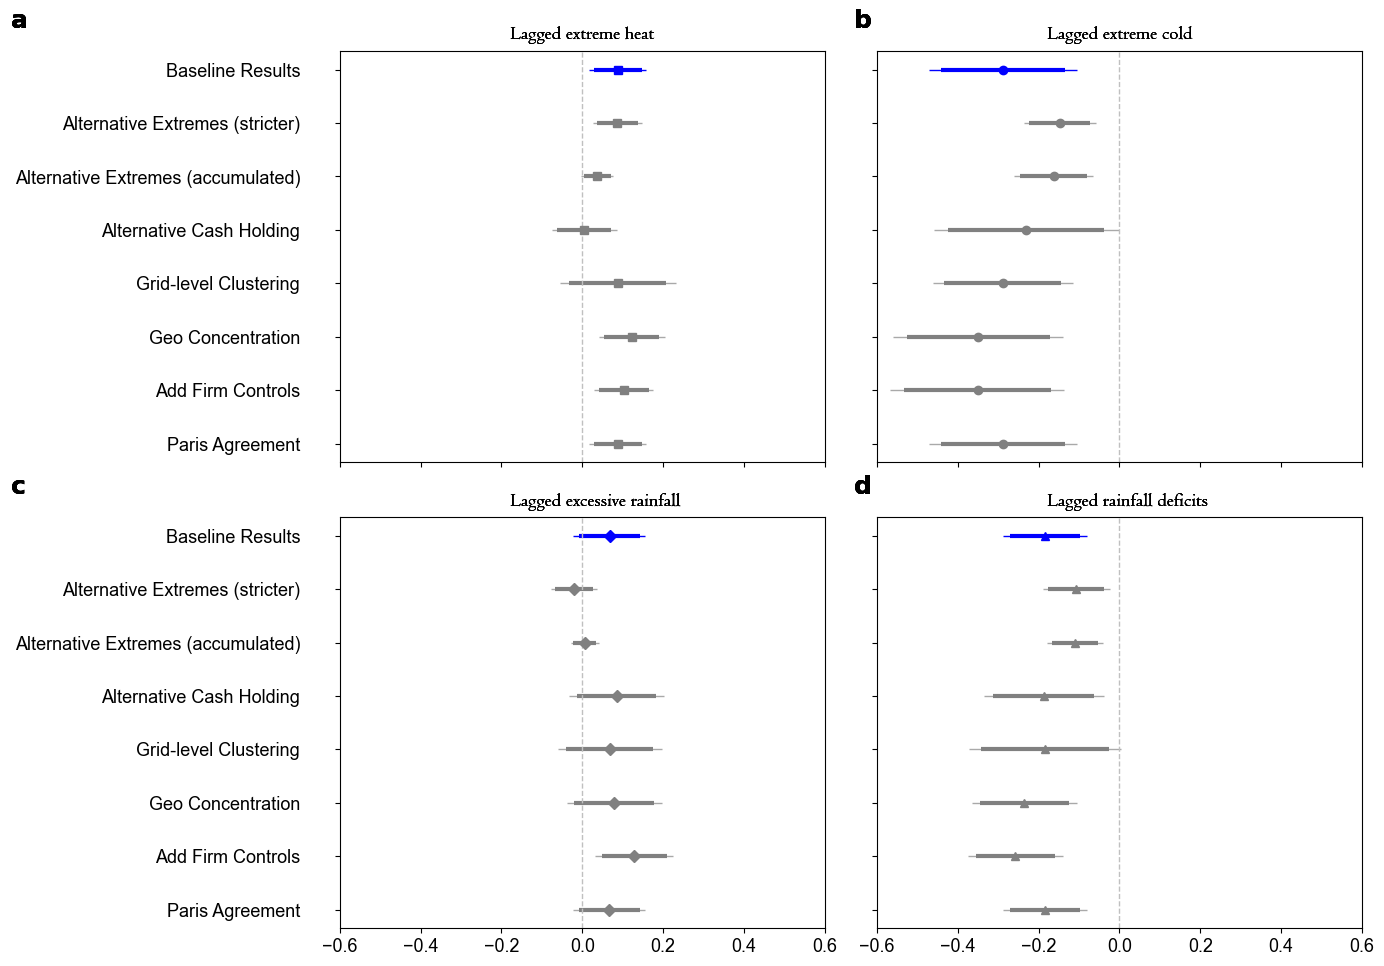

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置字体
plt.rcParams["font.family"] = "Arial"

# 直接读取数据文件（移除try-except和模拟数据部分）
df = pd.read_excel("Robust figure.xlsx")

# 设置变量顺序（每张图一个变量）
variables = [
    "TPos_lag_TNone",
    "TNeg_lag_TNone",
    "PPos_lag_PNone",
    "PNeg_lag_PNone"
]

# 所有 group 的顺序
groups = df["Group"].unique()
group_pos = np.arange(len(groups))

# marker 形状
markers = {
    "TPos_lag_TNone": "s",
    "TNeg_lag_TNone": "o",
    "PPos_lag_PNone": "D",
    "PNeg_lag_PNone": "^"
}

# 颜色设置（深色用于90% CI，浅色用于95% CI）
color_90 = {
    "Baseline Results": "blue",  # 深蓝
    "Other": "gray"              # 深棕
}
color_95 = {
    "Baseline Results": "b",  # 浅蓝
    "Other": "darkgrey"              # 浅棕
}

# 创建 2x2 子图
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# 字母部分：加粗16号，位置与原来一致
letter_titles = [
    [r"$\bf{a}$", -0.68, 1.1, 18, 'left', 'top'],  # 注意对齐方式改为'left'
    [r"$\bf{b}$", -0.05, 1.1, 18, 'left', 'top'],
    [r"$\bf{c}$", -0.68, 1.1, 18, 'left', 'top'],
    [r"$\bf{d}$", -0.05, 1.1, 18, 'left', 'top']
]

# 文字部分：正常14号，位置在字母右侧（x坐标微调）
text_titles = [
    ["Lagged extreme heat", 0.35, 1.06, 15, 'left', 'top'],  # x坐标比字母右移0.08
    ["Lagged extreme cold", 0.35, 1.06, 15, 'left', 'top'],
    ["Lagged excessive rainfall", 0.35, 1.06, 15, 'left', 'top'],
    ["Lagged rainfall deficits", 0.35, 1.06, 15, 'left', 'top']
]

# 定义浅色字体样式
light_font = {
    'family': 'Centaur',  # 字体名称
    'color':  'black',   # 浅灰色（也可用HEX如'#808080'）
    'weight': 'normal', # 不加粗
    'size': 14,
}

for i, var in enumerate(variables):
    ax = axs[i]
    subset = df[df["variables"] == var]

    # 按 group 顺序排序
    subset = subset.set_index("Group").loc[groups].reset_index()

    for j, row in subset.iterrows():
        group = row["Group"]
        est = row["Estimate"]

        if pd.isna(est):
            continue

        err_90 = [[est - row["Lower_90_CI"]], [row["Upper_90_CI"] - est]]
        err_95 = [[est - row["Lower_95_CI"]], [row["Upper_95_CI"] - est]]
        y = j

        # 判断颜色：Baseline 深蓝/浅蓝，其他 深棕/浅棕
        key = "Baseline Results" if group == "Baseline Results" else "Other"
        c_90 = color_90[key]
        c_95 = color_95[key]

        # ---- 95% CI（浅色，底层）----
        ax.errorbar(
            est, y, xerr=np.abs(err_95),
            fmt='none',
            ecolor=c_95,
            elinewidth=1,
            alpha=1.0,
            capsize=0,
            zorder=1
        )

        # ---- 90% CI（深色，有marker，顶层）----
        ax.errorbar(
            est, y, xerr=np.abs(err_90),
            fmt=markers[var],
            color=c_90,
            elinewidth=3,
            capsize=0,
            markersize=6,
            zorder=2
        )

    # 设置 Y轴 group 标签
    ax.set_yticks(group_pos)
    if i % 2 == 0:
        ax.set_yticklabels(groups, fontsize=13, ha='right')
        ax.tick_params(axis='y', pad=25)
    else:
        ax.set_yticklabels([])

    # X轴设置 - 统一设置为 -0.6 到 0.6
    ax.set_xlim(-0.6, 0.6)
    ax.axvline(0, color='silver', linestyle='--', linewidth=1)
    ax.set_xlabel("")
    ax.tick_params(axis='x', labelsize=13)
    
    # 移除a和b子图（索引0和1）的X轴刻度标注
    if i in [0, 1]:  # a和b子图
        ax.set_xticklabels([])
    
    ax.invert_yaxis()

    # 在绘图循环中添加标题
    for i, ax in enumerate(axs):
    # 添加字母
      letter, x, y, size, ha, va = letter_titles[i]
      ax.text(x, y, letter, transform=ax.transAxes, fontsize=size, ha=ha, va=va)
    
    # 添加文字
      text, x, y, size, ha, va = text_titles[i]
      ax.text(x, y, text, transform=ax.transAxes, fontdict=light_font, ha=ha, va=va)

# 调整布局 & 保存
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig("figure_by_variable_layers4.png", dpi=500, bbox_inches="tight")
plt.show()